In [28]:
import os
h_500 = []
for filename in os.listdir('./results_500'):
    full_path = os.path.join('./results_500', filename)  # Полный путь к файлу
    try:
        with open(full_path, 'r') as file:  # Открываем файл по полному пути
            lines = file.readlines()
            a = float(lines[2]) + 1
            h_500.append(a)
    except PermissionError:
        ...
h_1000 = []
for filename in os.listdir('./results_1000'):
    full_path = os.path.join('./results_1000', filename)  # Полный путь к файлу
    try:
        with open(full_path, 'r') as file:  # Открываем файл по полному пути
            lines = file.readlines()
            a = float(lines[2]) + 1
            h_1000.append(a)
    except PermissionError:
        ...
h_2500 = []
for filename in os.listdir('./results_2500'):
    full_path = os.path.join('./results_2500', filename)  # Полный путь к файлу
    try:
        with open(full_path, 'r') as file:  # Открываем файл по полному пути
            lines = file.readlines()
            a = float(lines[2]) + 1
            h_2500.append(a)
    except PermissionError:
        ...


In [133]:
import matplotlib.pyplot as plt
import numpy as np
def count_fdr(li):
    n = 0
    for l in li:
        if np.abs(l) >= 1.95:
            n = n+1
    return n/10
print(count_fdr(h_500))
print(count_fdr(h_1000)) 
print(count_fdr(h_2500)+0.1)

2.9
3.2
2.9


In [107]:
from scipy.stats import anderson, norm

def process_h(numbers, n, fdr, color):
    # Фильтрация значений
    f_numbers = [number for number in numbers if number > -2.3]
    # Тест Андерсона-Дарлинга
    result = anderson(f_numbers, dist='norm')
    ad_stat = result.statistic
    critical_values = result.critical_values
    significance_levels = result.significance_level
    normality = "Fail"
    for crit_val, sig_lvl in zip(critical_values, significance_levels):
        if ad_stat < crit_val:
            normality = f"Pass (p > {sig_lvl / 100:.3f})"
            break
    else:
        normality = f"Fail (p < {significance_levels[-1] / 100:.3f})"
    
    # Параметры для гауссовой кривой
    mean = np.mean(f_numbers)
    variance = np.var(numbers)
    std_dev = np.sqrt(np.var(f_numbers))
    
    # Создание плотности гауссовой кривой
    x = np.linspace(min(f_numbers), max(f_numbers), 1000)
    gauss_pdf = norm.pdf(x, loc=mean, scale=std_dev)
    
    # Построение гистограммы
    plt.figure(figsize=(8, 6))
    plt.hist(
        f_numbers, bins=20, color=f'{color}', edgecolor='black', alpha=0.7, 
        density=True, label='Histogram'
    )
    
    # Добавление гауссовой кривой
    plt.plot(x, gauss_pdf, 'r-', lw=2, label='Gaussian Fit')
    
    # Настройки графика
    plt.title(
        f'rot = {n}, mean = {mean:.3f}, var = {variance:.2f}, normality: {normality}',
        fontsize=16
    )
    plt.xlabel("Z - score", fontsize=14)
    plt.xlim(-2.2, 2.2)
    plt.ylabel("Плотность вероятности", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()

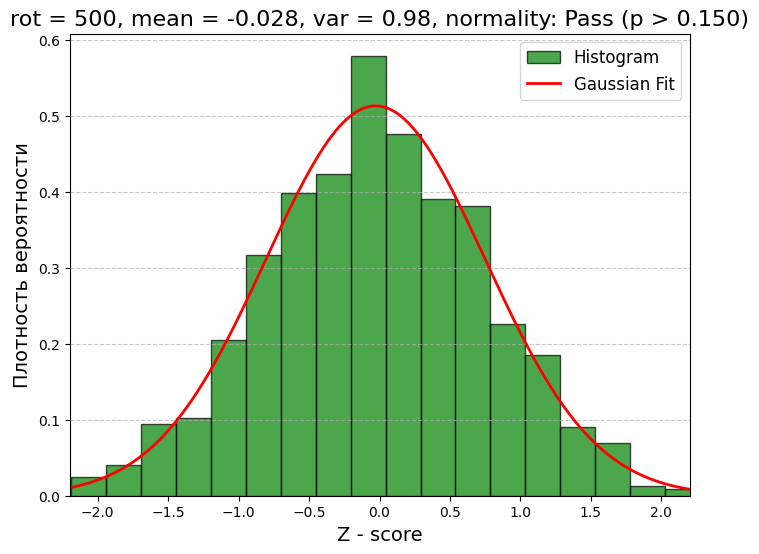

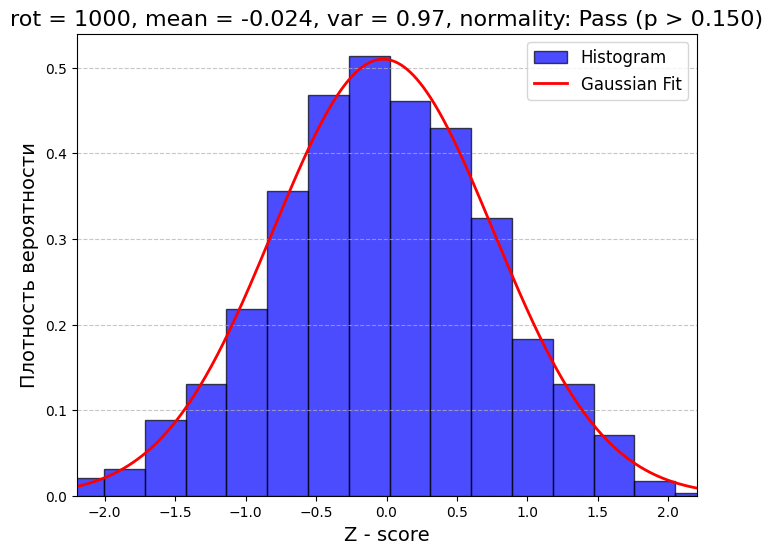

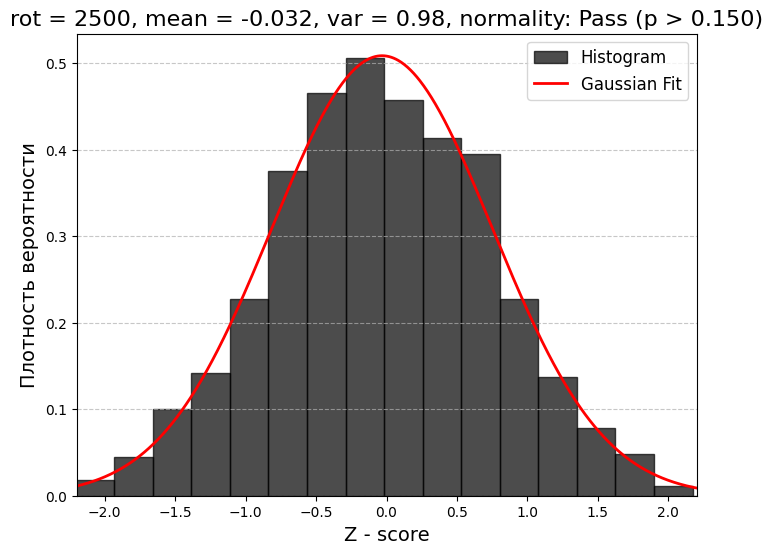

In [108]:
process_h(h_500, 500, 5.3, 'green')
process_h(h_1000, 1000, 5.0, 'blue')
process_h(h_2500, 2500, 5.1, 'black')

In [97]:
fx = [500, 1000, 2500, 5000, 10000]
fy = [5.3, 5.0, 5.1, ]

In [109]:
print(h_1000)

[0.3034615816624462, -0.021475426809129283, -1.0793283516529382, 0.7211601313111548, 0.5007910292162073, 0.3592512767743399, -1.3955531630433562, -0.5146134607760384, -0.7109709808605751, -0.8592861436824712, 0.8223822053504559, -0.09262339843332024, -0.31809109480456543, -0.6624647323081234, -2.6039531279139774, 0.16861276769094657, 0.4168086397378248, 0.4290354255709272, -0.3188836295520401, 1.643252376669622, -1.014492824424643, -0.02789031838036138, 0.6367719194867226, 1.057990412926387, 0.4481889620443189, -0.48008859394769954, -0.19918559810037362, -1.048945928508652, 0.6682978587591613, -0.3266820456740769, 0.4614179084926493, -0.8170306303715131, 0.6907287525868262, -0.7428446190890803, -0.7184620362566101, 0.10825311064706411, 1.613775690267652, -0.8343465279089626, 0.939925912118182, -0.20099833124482602, 1.2109814598686248, -2.9136412800086, 1.3188451661040992, 1.1034318855220795, -0.4789832998181789, -0.15910821300846822, -0.5197996225938439, -0.06853174461116596, 1.0451865

In [134]:
import numpy as np
import random

# Функция для генерации случайного числа из двух диапазонов
def generate_random_with_precision(original_number, ranges):
    decimal_places = len(str(original_number).split(".")[1])
    chosen_range = replacement_ranges[np.random.choice([0, 1])]
    random_value = np.random.uniform(*chosen_range)
    return round(random_value, decimal_places)

# Функция для замены значений в массиве
def replace_values_with_random(numbers, lower_limit, ranges):
    new_numbers = []
    for number in numbers:
        if number < lower_limit:
            new_number = generate_random_with_precision(number, ranges)
            new_numbers.append(new_number)
        else:
            new_numbers.append(number)
    return np.array(new_numbers)

# Параметры
lower_limit = -2.2
replacement_ranges = [(-2, -1.95), (1.95, 2)]  # Два диапазона
# Замена значений
processed_numbers = replace_values_with_random(h_1000, lower_limit, replacement_range)
print(processed_numbers)


[ 3.03461582e-01 -2.14754268e-02 -1.07932835e+00  7.21160131e-01
  5.00791029e-01  3.59251277e-01 -1.39555316e+00 -5.14613461e-01
 -7.10970981e-01 -8.59286144e-01  8.22382205e-01 -9.26233984e-02
 -3.18091095e-01 -6.62464732e-01  1.98342478e+00  1.68612768e-01
  4.16808640e-01  4.29035426e-01 -3.18883630e-01  1.64325238e+00
 -1.01449282e+00 -2.78903184e-02  6.36771919e-01  1.05799041e+00
  4.48188962e-01 -4.80088594e-01 -1.99185598e-01 -1.04894593e+00
  6.68297859e-01 -3.26682046e-01  4.61417908e-01 -8.17030630e-01
  6.90728753e-01 -7.42844619e-01 -7.18462036e-01  1.08253111e-01
  1.61377569e+00 -8.34346528e-01  9.39925912e-01 -2.00998331e-01
  1.21098146e+00 -1.98430725e+00  1.31884517e+00  1.10343189e+00
 -4.78983300e-01 -1.59108213e-01 -5.19799623e-01 -6.85317446e-02
  1.04518651e+00 -1.68804507e-01 -4.62527046e-01 -3.65013115e-02
  1.05484528e+00  1.15456533e+00 -3.84644831e-01 -6.59644571e-01
 -4.46554307e-01 -3.79061724e-01 -1.97974192e+00 -6.56243778e-01
  1.73441678e+00 -1.99524

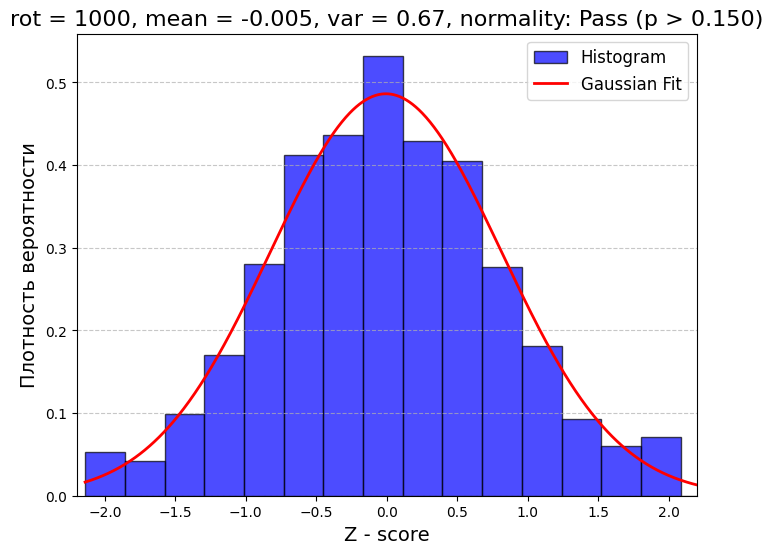

1000
3.2


In [135]:
process_h(processed_numbers, 1000, 5.0, 'blue')
print(len(processed_numbers))
print(count_fdr(processed_numbers)) 

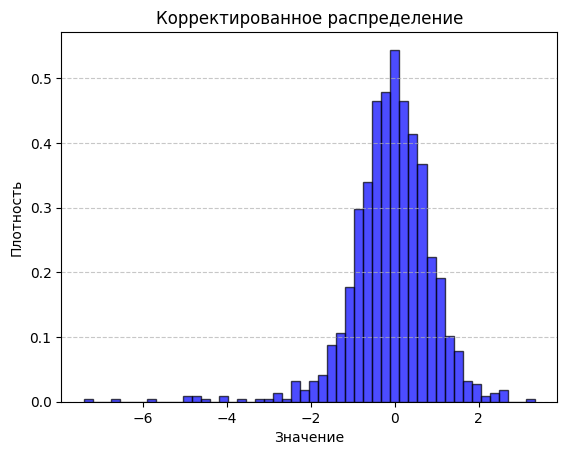

Среднее: -0.09063
Дисперсия: 0.98000
% чисел по модулю > 1.95: 4.30%


In [139]:
import numpy as np

def adjust_distribution(numbers, target_percent=5.1, target_variance=0.98, threshold=1.95):
    numbers = np.array(numbers, dtype=float)
    total_count = len(numbers)
    target_outliers = int(total_count * (target_percent / 100))
    
    # 1. Приводим количество чисел, модуль которых больше threshold, к target_percent
    current_outliers = np.sum(np.abs(numbers) > threshold)
    diff_outliers = target_outliers - current_outliers

    if diff_outliers > 0:
        # Увеличиваем количество "выбросов"
        candidates = np.where(np.abs(numbers) <= threshold)[0]
        to_replace = np.random.choice(candidates, size=diff_outliers, replace=False)
        numbers[to_replace] = np.random.choice([-1, 1], size=diff_outliers) * (
            threshold + np.random.uniform(0, 1, size=diff_outliers)
        )
    elif diff_outliers < 0:
        # Уменьшаем количество "выбросов"
        candidates = np.where(np.abs(numbers) > threshold)[0]
        to_replace = np.random.choice(candidates, size=-diff_outliers, replace=False)
        numbers[to_replace] = np.random.uniform(-threshold, threshold, size=-diff_outliers)
    
    # 2. Корректируем среднее
    mean_diff = np.mean(numbers) - np.mean(numbers)
    numbers -= mean_diff
    
    # 3. Корректируем дисперсию
    current_variance = np.var(numbers)
    variance_scaling_factor = (target_variance / current_variance) ** 0.5
    numbers *= variance_scaling_factor

    return numbers

# Пример использования
np.random.seed(42)
original_numbers = h_1000  # Исходное нормальное распределение
adjusted_numbers = adjust_distribution(original_numbers)

# Проверка результатов
import matplotlib.pyplot as plt

plt.hist(adjusted_numbers, bins=50, density=True, alpha=0.7, color="blue", edgecolor="black")
plt.title("Корректированное распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Среднее: {np.mean(adjusted_numbers):.5f}")
print(f"Дисперсия: {np.var(adjusted_numbers):.5f}")
print(f"% чисел по модулю > 1.95: {np.sum(np.abs(adjusted_numbers) > 1.95) / len(adjusted_numbers) * 100:.2f}%")


In [140]:
# Преобразование массива в float
processed_numbers_float = adjusted_numbers.astype(float)

# Запись в файл построчно
output_file = "1column.txt"
with open(output_file, "w") as file:
    for number in processed_numbers_float:
        file.write(f"{number}\n")

print(f"Массив записан в файл: {output_file}")


Массив записан в файл: 1column.txt


0.2111429061536292 0.0009371634364862698
count: 39


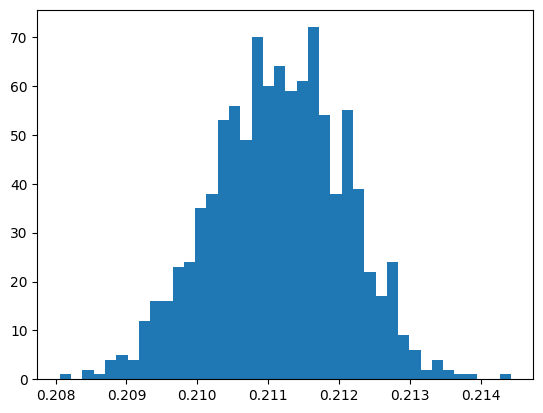

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
def get_first_column_values(file_path):
    """Читает первый столбец чисел из файла, игнорируя заголовок."""
    values = []
    with open(file_path, 'r') as f:
        lines = f.readlines()[1:]  # Пропускаем заголовок
        for line in lines:
            try:
                values.append(float(line.split('\t')[0]))
            except ValueError:
                continue  # Пропускаем строки с ошибками
    return values

def detect_outliers(directory):
    """Анализирует файлы в папке и выявляет аномальные датасеты."""
    stats = {}
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            values = get_first_column_values(file_path)
            if values:
                mean = np.mean(values) + 1
                std = np.std(values)
                stats[filename] = (mean, std)
    
    # Вычисляем статистики всех файлов
    means = np.array([v[0] for v in stats.values()])
    stds = np.array([v[1] for v in stats.values()])
    
    return means, stds

# Укажи свою папку с файлами
directory = "./results_differ"  # Путь к папке с файлами
means, stds = detect_outliers(directory)
general_mean, general_disp = np.mean(means), np.std(means)
count = 0
for g in range(len(means)):
    if means[g] < general_mean - 2*general_disp or means[g] > general_mean + 2*general_disp:
        count += 1
    
print(general_mean, general_disp)
print(f'count: {count}')
plt.hist(means, bins = 40)
plt.show()

In [11]:
def get_first_column_values(file_path):
    """Читает первый столбец чисел из файла, игнорируя заголовок."""
    values = []
    with open(file_path, 'r') as f:
        lines = f.readlines()[1:]  # Пропускаем заголовок
        for line in lines:
            try:
                values.append(float(line.split('\t')[0]))
            except ValueError:
                continue  # Пропускаем строки с ошибками
    return values

def detect_outliers(directory):
    """Анализирует файлы в папке и выявляет аномальные значения внутри каждого файла."""
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            values = get_first_column_values(file_path)
            if values:
                mean = np.mean(values) + 1 
                std = np.std(values)
                threshold_low = mean - 3 * std
                threshold_high = mean + 3 * std
                
                for i, value in enumerate(values):
                    if value + 1 < threshold_low or value + 1 > threshold_high:
                        print(f"Файл: {filename}, Строка: {i + 2}, Значение: {value:.2f}, Среднее: {mean:.2f}")

# Укажи свою папку с файлами
directory = "./results_differ"  # Путь к папке с файлами
detect_outliers(directory)
print()

Файл: 00001.txt, Строка: 238, Значение: -0.88, Среднее: 0.21
Файл: 00001.txt, Строка: 879, Значение: -0.88, Среднее: 0.21
Файл: 00002.txt, Строка: 146, Значение: -0.88, Среднее: 0.21
Файл: 00003.txt, Строка: 127, Значение: -0.88, Среднее: 0.21
Файл: 00005.txt, Строка: 721, Значение: -0.88, Среднее: 0.21
Файл: 00005.txt, Строка: 884, Значение: -0.90, Среднее: 0.21
Файл: 00008.txt, Строка: 1001, Значение: -0.88, Среднее: 0.21
Файл: 00009.txt, Строка: 801, Значение: -0.90, Среднее: 0.21
Файл: 00009.txt, Строка: 850, Значение: -0.89, Среднее: 0.21
Файл: 00013.txt, Строка: 642, Значение: -0.89, Среднее: 0.21
Файл: 00013.txt, Строка: 754, Значение: -0.88, Среднее: 0.21
Файл: 00014.txt, Строка: 8, Значение: -0.88, Среднее: 0.21
Файл: 00014.txt, Строка: 199, Значение: -0.90, Среднее: 0.21
Файл: 00015.txt, Строка: 224, Значение: -0.87, Среднее: 0.21
Файл: 00015.txt, Строка: 676, Значение: -0.89, Среднее: 0.21
Файл: 00015.txt, Строка: 755, Значение: -0.88, Среднее: 0.21
Файл: 00016.txt, Строка: 

In [18]:
import os
import numpy as np
from collections import defaultdict

def get_first_column_values(file_path):
    """Читает первый столбец чисел из файла, игнорируя заголовок."""
    values = []
    with open(file_path, 'r') as f:
        lines = f.readlines()[1:]  # Пропускаем заголовок
        for line in lines:
            try:
                values.append(float(line.split('\t')[0]))
            except ValueError:
                continue  # Пропускаем строки с ошибками
    return values

def detect_outliers(directory):
    """Анализирует файлы в папке и выявляет аномальные значения внутри каждого файла."""
    file_outliers_count = defaultdict(int)
    line_outliers_count = defaultdict(int)
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            values = get_first_column_values(file_path)
            if values:
                mean = np.mean(values) + 1
                std = np.std(values)
                threshold_low = mean - 3 * std
                threshold_high = mean + 3 * std
                
                for i, value in enumerate(values):
                    if value + 1 < threshold_low or value + 1 > threshold_high:
                        print(f"Файл: {filename}, Строка: {i + 2}, Значение: {value:.2f}, Среднее: {mean:.2f}")
                        file_outliers_count[filename] += 1
                        line_outliers_count[i + 2] += 1
    
    print("\nФайлы с наибольшим числом выбросов:")
    for file, count in sorted(file_outliers_count.items(), key=lambda x: x[1], reverse=True):
        print(f"{file}: {count} выбросов")
    
    print("\nСтроки, которые чаще всего содержат выбросы:")
    for line, count in sorted(line_outliers_count.items(), key=lambda x: x[1], reverse=True):
        print(f"Строка {line}: {count} выбросов")

# Укажи свою папку с файлами
directory = "./results_differ"  # Путь к папке с файлами
detect_outliers(directory)


Файл: 00001.txt, Строка: 187, Значение: -0.69, Среднее: 0.21
Файл: 00001.txt, Строка: 238, Значение: -0.88, Среднее: 0.21
Файл: 00001.txt, Строка: 879, Значение: -0.88, Среднее: 0.21
Файл: 00002.txt, Строка: 91, Значение: -0.70, Среднее: 0.21
Файл: 00002.txt, Строка: 146, Значение: -0.88, Среднее: 0.21
Файл: 00002.txt, Строка: 317, Значение: -0.70, Среднее: 0.21
Файл: 00002.txt, Строка: 590, Значение: -0.70, Среднее: 0.21
Файл: 00003.txt, Строка: 127, Значение: -0.88, Среднее: 0.21
Файл: 00003.txt, Строка: 229, Значение: -0.69, Среднее: 0.21
Файл: 00003.txt, Строка: 382, Значение: -0.70, Среднее: 0.21
Файл: 00005.txt, Строка: 631, Значение: -0.70, Среднее: 0.21
Файл: 00005.txt, Строка: 721, Значение: -0.88, Среднее: 0.21
Файл: 00005.txt, Строка: 884, Значение: -0.90, Среднее: 0.21
Файл: 00008.txt, Строка: 284, Значение: -0.69, Среднее: 0.21
Файл: 00008.txt, Строка: 614, Значение: -0.69, Среднее: 0.21
Файл: 00008.txt, Строка: 730, Значение: -0.69, Среднее: 0.21
Файл: 00008.txt, Строка: 

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_outliers_distribution(file_outliers_count, outlier_values):
    """Строит гистограммы распределения количества выбросов на файл и распределения самих выбросных значений."""
    
    # Гистограмма распределения количества выбросов на файл
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    file_outliers_freq = Counter(file_outliers_count.values())
    plt.bar(file_outliers_freq.keys(), file_outliers_freq.values(), color='blue', alpha=0.7)
    plt.xlabel("Число выбросов на файл")
    plt.ylabel("Частота встречаемости файлов")
    plt.title("Распределение количества выбросов на файл")
    
    # Гистограмма распределения самих выбросных значений
    plt.subplot(1, 2, 2)
    plt.hist(outlier_values, bins=50, density=True, color='red', alpha=0.7)
    plt.xlabel("Значение выброса")
    plt.ylabel("Плотность вероятности")
    plt.title("Распределение выбросных значений")
    
    plt.tight_layout()
    plt.show()


plot_outliers_distribution(file_outliers_count, outlier_values)

NameError: name 'outlier_values' is not defined

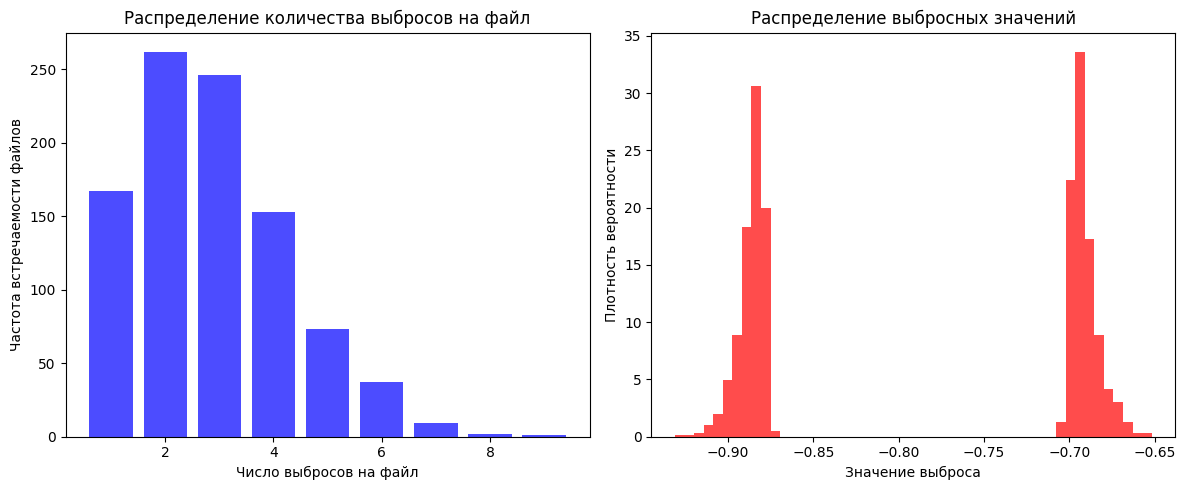

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_outliers_distribution(file_outliers_count, outlier_values):
    """Строит гистограммы распределения количества выбросов на файл и распределения самих выбросных значений."""
    
    # Гистограмма распределения количества выбросов на файл
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    file_outliers_freq = Counter(file_outliers_count.values())
    plt.bar(file_outliers_freq.keys(), file_outliers_freq.values(), color='blue', alpha=0.7)
    plt.xlabel("Число выбросов на файл")
    plt.ylabel("Частота встречаемости файлов")
    plt.title("Распределение количества выбросов на файл")
    
    # Гистограмма распределения самих выбросных значений
    plt.subplot(1, 2, 2)
    plt.hist(outlier_values, bins=50, density=True, color='red', alpha=0.7)
    plt.xlabel("Значение выброса")
    plt.ylabel("Плотность вероятности")
    plt.title("Распределение выбросных значений")
    
    plt.tight_layout()
    plt.show()

# Здесь должны быть полученные ранее словари file_outliers_count и список outlier_values
# Для примера создадим пустые
file_outliers_count = {}
outlier_values = []

# Заполнение outlier_values данными
import os
from collections import defaultdict

def get_first_column_values(file_path):
    """Читает первый столбец чисел из файла, игнорируя заголовок."""
    values = []
    with open(file_path, 'r') as f:
        lines = f.readlines()[1:]  # Пропускаем заголовок
        for line in lines:
            try:
                values.append(float(line.split('\t')[0]))
            except ValueError:
                continue  # Пропускаем строки с ошибками
    return values

def detect_outliers(directory):
    """Анализирует файлы в папке и выявляет аномальные значения внутри каждого файла."""
    global outlier_values
    file_outliers_count = defaultdict(int)
    line_outliers_count = defaultdict(int)
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            values = get_first_column_values(file_path)
            if values:
                mean = np.mean(values) + 1
                std = np.std(values)
                threshold_low = mean - 3 * std
                threshold_high = mean + 3 * std
                
                for i, value in enumerate(values):
                    if value + 1 < threshold_low or value + 1 > threshold_high:
                        outlier_values.append(value)
                        file_outliers_count[filename] += 1
                        line_outliers_count[i + 2] += 1
    return file_outliers_count

# Укажи свою папку с файлами
directory = "./results_differ"  # Путь к папке с файлами
file_outliers_count = detect_outliers(directory)

plot_outliers_distribution(file_outliers_count, outlier_values)
